## Import Libraries and Load Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

footballData = pd.read_csv('https://raw.githubusercontent.com/martj42/international_results/master/results.csv')

## Question (a)

In [2]:
pd.set_option('display.max_columns', None)
footballData.head()

# # alternative
# print(footballData.columns.tolist())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## Question (b)

In [3]:
footballData.describe()

,home_score,away_score
count,43086.000000,43086.000000
mean,1.743095,1.183563
std,1.753931,1.400585
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## Question (c)

In [4]:
teams = ['Argentina', 'Brazil', 'England', 'Germany']
df4 = footballData[(footballData['home_team'].isin(teams)) & (footballData['away_team'].isin(teams))]
df4

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
410,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False
411,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False
442,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False
472,1917-10-03,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True
508,1919-05-18,Brazil,Argentina,3,1,Copa América,Rio de Janeiro,Brazil,False
...,...,...,...,...,...,...,...,...,...
41039,2019-07-02,Brazil,Argentina,2,0,Copa América,Belo Horizonte,Brazil,False
41334,2019-10-09,Germany,Argentina,2,2,Friendly,Dortmund,Germany,False
42476,2021-06-29,England,Germany,2,0,UEFA Euro,London,England,False
42511,2021-07-10,Brazil,Argentina,0,1,Copa América,Rio de Janeiro,Brazil,False


## Question (d)(i)

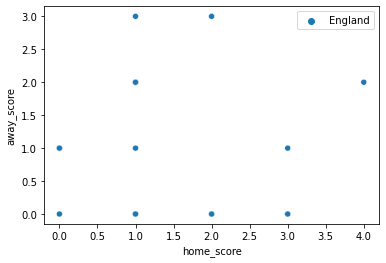

In [5]:
eurTeams = ['England', 'Germany']
df6 = footballData[(footballData['home_team'].isin(eurTeams)) & (footballData['away_team'].isin(eurTeams))]
EG = df6[(df6['home_team'] == 'England')]
GE = df6[(df6['home_team'] == 'Germany')]

sns.scatterplot(x='home_score', y='away_score', hue='home_team', data=EG)

## alternative
# sns.scatterplot(x='home_score', y='away_score', hue='home_team', data=df6)

plt.legend(loc='upper right')
plt.show()

## Question (d)(ii)

In [6]:
max_score_EG = int(max(EG['home_score'].max(), EG['away_score'].max()))
print(max_score_EG)

## alternative
# max_score = int(max(df6['home_score'].max(), df6['away_score'].max()))
# print(max_score)

4


## Question (d)(iii)

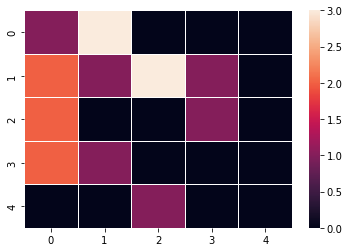

In [7]:
EGScores = [[0 for i in range(max_score_EG + 1)] for j in range(max_score_EG + 1)]
number_of_scores = EG.count()['home_score']
for i in range(number_of_scores):
    homeScore = int(EG.iloc[i]['home_score'])
    awayScore = int(EG.iloc[i]['away_score'])
    EGScores[homeScore][awayScore] = EGScores[homeScore][awayScore] + 1
sns.heatmap(EGScores, linewidth=0.5)
plt.show()

## alternative
# sns.heatmap(df6.groupby(['home_score','away_score']).size().unstack(), annot=True).invert_yaxis()
# sns.heatmap(pd.crosstab(df6['home_score'], df6['away_score']), annot=True).invert_yaxis()
# sns.heatmap(df6[['home_score','away_score']].pivot_table(index='home_score', columns='away_score', aggfunc=len, fill_value=0), annot=True).invert_yaxis()

## Question (d)(iv)

In [8]:
# --- count England's win rate against Germany
df7a = EG[EG['home_score'] > EG['away_score']]
print(df7a.count())
print(df7a[['home_score', 'away_score']])
df7b = GE[GE['away_score'] > GE['home_score']]
print(df7b.count())
print(df7b[['home_score', 'away_score']])
df7c = EG[EG['home_score'] == EG['away_score']]
print(df7c.count())
print(df7c[['home_score', 'away_score']])
df7d = GE[GE['away_score'] == GE['home_score']]
print(df7d.count())
print(df7d[['home_score', 'away_score']])

EHomeWinCount = len(df7a.index)
EAwayWinCount = len(df7b.index)
EWinCount = EHomeWinCount + EAwayWinCount
print('England Home, Away, Total Win Count against Germany :')
print(EHomeWinCount, EAwayWinCount, EWinCount)
total_matches = len(EG.index) + len(GE.index)
print('Total number of England Home and Away matches with Germany : ')
print(len(EG.index), len(GE.index), total_matches)
print('England win rate against Germany:')
print(EWinCount / total_matches)

## alternative
# df6_home = df6[df6.home_team == 'England']
# print(f"Home Win Rate = {(df6_home.home_score > df6_home.away_score).mean():.3f}")
# df6_away = df6[df6.away_team == 'England']
# print(f"Away Win Rate = {(df6_away.home_score < df6_away.away_score).mean():.3f}")
# print(f"Total Win Rate = {(((df6.home_score > df6.away_score) & (df6.home_team == 'England')) | ((df6.home_score < df6.away_score) & (df6.away_team == 'England'))).mean():.3f}")

date          8
home_team     8
away_team     8
home_score    8
away_score    8
tournament    8
city          8
country       8
neutral       8
dtype: int64
       home_score  away_score
1851            3           0
3739            3           1
6096            1           0
6269            4           2
9336            2           0
13887           3           0
23138           1           0
42476           2           0
date          6
home_team     6
away_team     6
home_score    6
away_score    6
tournament    6
city          6
country       6
neutral       6
dtype: int64
       home_score  away_score
2090            3           6
3972            1           3
5871            0           1
24387           1           5
30993           1           2
37907           2           3
date          2
home_team     2
away_team     2
home_score    2
away_score    2
tournament    2
city          2
country       2
neutral       2
dtype: int64
       home_score  away_score
19838           1  